In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

### Data cleaning
*By Charlie Lovett*

We created our dataset by accumulating data for singular predictors by country from the WHO website. For each of these individual datasets, we removed unnecessary columns and then merged them all together by country. We then exported this merged dataset as 'merged.csv' to use to create our model. For the sake of simplicity, we have not included the code that we used to clean all of our predictors, but the following code offers an example of the cleaning that was done on one dataset (beer as a share of alcohol consumption for each country).

In [20]:
beershare = pd.read_csv("Datasets/beer-as-share-alcohol-consumption.csv")
beershare.head()

,Entity,Code,Year,"Indicator:Alcohol, consumption of pure alcohol by type of beverage (%) - Beverage Types:Beer"
0,Albania,ALB,2016,34.3
1,Algeria,DZA,2016,57.3
2,Andorra,AND,2016,34.1
3,Angola,AGO,2016,70.3
4,Antigua and Barbuda,ATG,2016,33.0


In [21]:
beershare = beershare.rename(columns = {"Indicator:Alcohol, consumption of pure alcohol by type of beverage (%) - Beverage Types:Beer": "beer_as_share_alcohol_consumption", "Entity": "Country"})
beershare = beershare.drop(columns = {"Code","Year"})
beershare.head()

,Country,beer_as_share_alcohol_consumption
0,Albania,34.3
1,Algeria,57.3
2,Andorra,34.1
3,Angola,70.3
4,Antigua and Barbuda,33.0


### Data quality check
*By Jack Troxel*

In [44]:
# Reading and quickly removing unnecessary columns from the merged dataset
train = pd.read_csv('Datasets/merged.csv')
train = train.drop(columns = {'Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0','Country', 'alc_attributed_fraction_deaths'})
train = train.rename(columns = {'too_many_alc_deaths': 'high_risk'})
train.head()

,wine_as_share_alcohol_consumption,beer_as_share_alcohol_consumption,spirits_as_share_alcohol_consumption,tot_alcohol_consumption_per_capita_liters,gdp_per_capita,Population,percent_who_have_not_drank_alcohol_in_last_year,perc_life_no_drink,total_alcohol_consumption_per_capita_liters,percent_who_have_drank_alcohol_in_last_year,...,perc_heavy_drinkers_female,perc_heavy_drinkers_male,perc_consume_alc_past12,perc_consume_alc_past12Female,perc_consume_alc_past12Male,Region,perc_dependent,perc_dependent_female,perc_dependent_male,high_risk
0,26.5,34.3,37.6,6.74,11878.454102,2882482.0,49.0,25.2,6.74,51.0,...,23.7,57.4,51.0,37.6,65.0,Europe,3.4,1.4,5.5,1
1,24.4,57.3,18.3,0.93,11696.950195,39543148.0,96.8,93.5,0.93,3.2,...,6.2,23.5,3.2,1.5,4.8,Africa,0.7,0.0,1.4,0
2,17.6,70.3,11.3,7.96,8036.411133,28127724.0,52.3,33.9,7.96,47.7,...,66.8,90.1,47.7,34.3,61.6,Africa,2.1,0.7,3.6,1
3,18.3,33.0,45.4,5.89,18594.544922,89958.0,50.6,27.7,5.89,49.4,...,25.9,60.9,49.4,36.5,63.9,Americas,2.7,1.8,3.8,0
4,40.2,39.9,9.6,9.55,23933.886719,43257064.0,32.6,6.7,9.55,67.4,...,15.2,45.5,67.4,55.7,79.9,Americas,2.9,1.2,4.8,0


The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

In [45]:
# Distribution of all 41 continuous variables in the dataset
train.describe()

,wine_as_share_alcohol_consumption,beer_as_share_alcohol_consumption,spirits_as_share_alcohol_consumption,tot_alcohol_consumption_per_capita_liters,gdp_per_capita,Population,percent_who_have_not_drank_alcohol_in_last_year,perc_life_no_drink,total_alcohol_consumption_per_capita_liters,percent_who_have_drank_alcohol_in_last_year,...,perc_heavy_drinkers_both_sexes,perc_heavy_drinkers_female,perc_heavy_drinkers_male,perc_consume_alc_past12,perc_consume_alc_past12Female,perc_consume_alc_past12Male,perc_dependent,perc_dependent_female,perc_dependent_male,high_risk
count,172.000000,172.000000,172.000000,176.000000,176.000000,1.760000e+02,175.000000,181.000000,182.000000,174.000000,...,161.000000,161.000000,161.000000,160.000000,160.000000,160.000000,161.000000,161.000000,161.000000,183.000000
mean,15.976163,44.012791,28.788953,6.147551,19310.667153,4.119821e+07,60.602857,44.183978,6.044143,39.445402,...,41.386957,21.839752,51.893789,39.180625,29.308750,49.277500,2.301863,0.903106,3.780124,0.284153
std,17.464502,22.156349,23.657400,4.199294,20029.814706,1.491975e+08,23.334798,28.284171,4.194188,23.393383,...,15.211181,12.454734,17.808950,23.674946,21.790539,26.230174,1.744042,0.800033,2.993510,0.452247
min,0.000000,2.300000,0.000000,0.003000,825.205688,8.995800e+04,8.200000,3.400000,0.003000,0.100000,...,1.900000,0.500000,2.300000,0.100000,0.100000,0.200000,0.100000,0.000000,0.200000,0.000000
25%,2.100000,29.275000,10.500000,2.190000,4382.449463,2.299560e+06,40.800000,17.900000,2.152500,21.900000,...,35.000000,15.500000,45.500000,21.825000,12.750000,31.000000,0.700000,0.200000,1.400000,0.000000
50%,8.400000,40.400000,23.850000,5.910000,11934.864258,8.799540e+06,63.600000,41.600000,5.825000,36.400000,...,42.500000,20.800000,54.300000,35.050000,22.950000,48.150000,2.500000,0.700000,3.900000,0.000000
75%,27.925000,57.450000,42.150000,9.580000,27912.890625,2.933118e+07,78.100000,66.400000,9.550000,59.450000,...,48.700000,25.800000,60.900000,59.775000,46.850000,72.825000,3.000000,1.400000,5.100000,1.000000
max,80.200000,100.000000,97.300000,18.350000,113182.726562,1.393715e+09,99.900000,99.500000,18.350000,91.800000,...,88.100000,79.100000,94.300000,91.800000,87.700000,95.800000,11.000000,3.800000,19.600000,1.000000


In [46]:
# Distribution of regions in the dataset
train.Region.value_counts()

Europe                   45
Africa                   43
Americas                 30
Eastern Mediterranean    19
Western Pacific          16
South-East Asia           9
Name: Region, dtype: int64

<AxesSubplot:xlabel='high_risk', ylabel='count'>

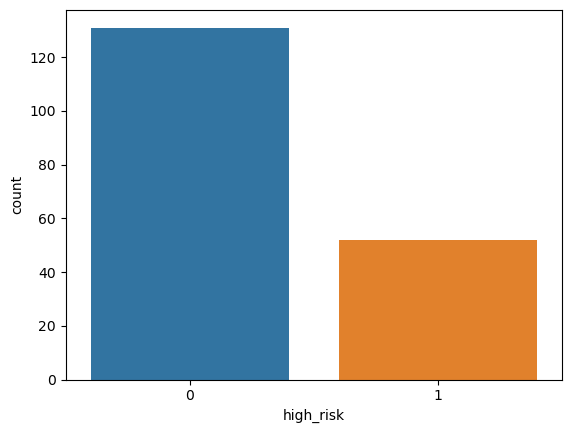

In [47]:
# Visualize the distribution of observations that do / don't classify as high risk for alcohol related mortality
sns.countplot(data=train, x='high_risk')

### Data preparation
*By Jack Troxel and Charlie Lovett*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. We first created our response variable artificially. We did this by classifying observations with alcohol attributable mortality rates greater than 6% as high risk. This value was determined based on information from the WHO website.

2. We shuffled our dataset to prepare for K-fold cross validation. Since we have population data in this case, K-fold CV will help us to analyze whether the model that we generate is better than a naive model that uses all of the predictors.

In [3]:
# Creating our response variable
train['high_risk'] = train['alc_attributed_fraction_deaths'].apply(lambda x: 1 if x>6 else 0)

In [48]:
# Shuffling the dataset for K-fold
train = train.sample(frac=1)
train.head()

,wine_as_share_alcohol_consumption,beer_as_share_alcohol_consumption,spirits_as_share_alcohol_consumption,tot_alcohol_consumption_per_capita_liters,gdp_per_capita,Population,percent_who_have_not_drank_alcohol_in_last_year,perc_life_no_drink,total_alcohol_consumption_per_capita_liters,percent_who_have_drank_alcohol_in_last_year,...,perc_heavy_drinkers_female,perc_heavy_drinkers_male,perc_consume_alc_past12,perc_consume_alc_past12Female,perc_consume_alc_past12Male,Region,perc_dependent,perc_dependent_female,perc_dependent_male,high_risk
20,3.4,61.8,34.3,7.86,15064.175781,205188208.0,59.7,21.4,7.86,40.3,...,25.1,60.3,40.3,27.3,54.0,Americas,1.4,0.5,2.3,1
43,44.7,37.4,17.1,10.36,52892.644531,5677795.0,25.6,10.7,10.36,74.4,...,21.5,54.3,74.4,64.2,85.0,Europe,3.9,2.2,5.6,0
111,0.8,39.7,59.5,5.03,5630.295898,6298610.0,67.5,31.6,5.03,32.5,...,17.4,49.3,32.5,20.8,44.9,Americas,2.8,1.8,3.9,1
8,36.9,61.5,0.0,4.58,14852.611328,9863485.0,78.1,53.2,4.58,21.9,...,15.6,46.0,21.9,12.8,31.6,Europe,3.4,1.4,5.5,0
45,4.4,52.2,41.9,6.61,15328.359375,10405832.0,57.0,32.8,6.61,43.0,...,23.9,58.1,43.0,29.7,56.7,Americas,2.8,1.8,3.9,1


## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

## Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.